In [1]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
'''this script concate each block per subject to a file wihthin subject called s103_df_concat.csv'''

'''subsequently save a concatenante file under rechain-beh called all_df_concat.csv '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
sns.set(style="whitegrid")
# top level dir 
# 

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')

list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

df = df[df['count'] >=3]
df = df[df['stimDur'] != 0.5]
df = df[df['stimDur'] != 0.05]
cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count'].to_numpy()



/tmp/ipykernel_1566401/1302369193.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_1566401/1302369193.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_1566401/1302369193.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [116]:
df.head()


,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ..."
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ..."
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ..."
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ..."
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0..."


In [117]:
df.shape

(7350, 12)

In [118]:
df

,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ..."
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ..."
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ..."
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ..."
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.3166489601135254,2308,[1],23,0,0.10,0.12,[-1. 1. 1. -1. -1. -1. -1. 1. 1. -1. -1. -...,9,"[-1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, ...",s113,"[-1.0, 0.0, 1.0, 0.0, -1.0, -2.0, -3.0, -2.0, ..."
996,2.599961996078491,2590,[1],25,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. 1. -1. -1. -1. ...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, 0.0, -1.0..."
997,2.2333149909973145,2225,[1],22,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. -1. 1. 1. -1. -...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, ...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, -2.0, -1...."
998,2.3499770164489746,2342,[1],23,0,0.10,0.12,[-1. 1. -1. -1. -1. -1. -1. 1. -1. 1. 1. -...,9,"[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0,...",s113,"[-1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -4.0..."


In [15]:

# calc


cumsum_stop_list = []
binary_seq_all = np.zeros_like(cumsum)
binary_seq_all.fill(np.nan)
for c in range(cumsum.shape[0]):
    binary_seq_all[c, : int(count[c])] = sequence[c, : int(count[c])]
    cumsum_stop = cumsum[
        c, : int(count[c])
    ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
    cumsum_stop_list.append(cumsum_stop)

In [16]:
min([len(i) for i in cumsum_stop_list])

3

In [17]:
level_at_response = [i[-1] for i in cumsum_stop_list]
resp = df['key'].tolist()

acc = []
for num, k in zip(level_at_response, resp):
    if (num <= 0 and k == 0) or (num >= 0 and k == 1):
        acc.append(1)
    else:
        acc.append(0)

print(sum(acc))
df['acc'] = acc

6323


Text(0, 0.5, 'Accuracy')

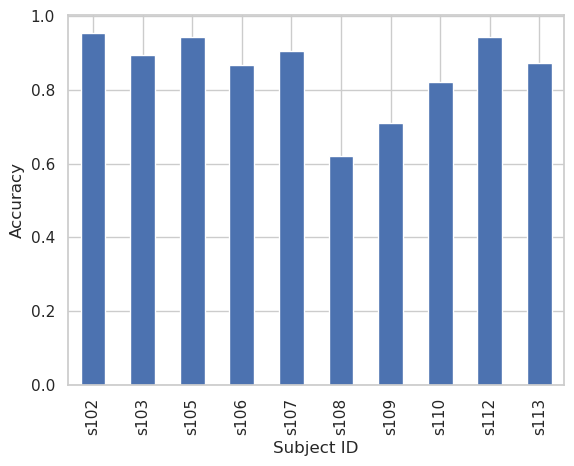

In [23]:
result = df.groupby('sid')['acc'].mean()
result.plot.bar(y = 'Accuracy')
plt.xlabel("Subject ID")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Number of Trials')

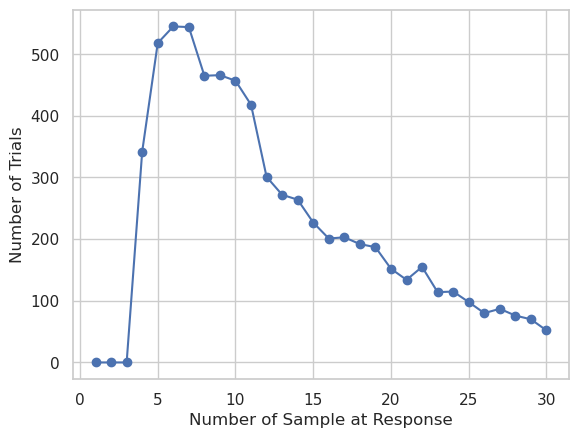

In [140]:
nancount = np.isnan(binary_seq_all).sum(axis=1)
nTrials = []
for t in range(0, 30):
    dataset = binary_seq_all[nancount == 30 - t, :]
    dataset = dataset[:, 0:t]
    nTrials.append(dataset.shape[0])
plt.plot(np.arange(1, 31), np.array(nTrials), "o-")
plt.xlabel("Number of Sample at Response")
plt.ylabel("Number of Trials")



In [2]:

# calculate terminated chains
cumsum_stop_list = []
binary_seq_all = np.zeros_like(cumsum)
binary_seq_all.fill(np.nan)
for c in range(cumsum.shape[0]):
    binary_seq_all[c, : int(count[c])] = sequence[c, : int(count[c])]
    cumsum_stop = cumsum[
        c, : int(count[c])
    ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
    cumsum_stop_list.append(cumsum_stop)
 
# count number of NaNs for each chain
nancount = np.isnan(binary_seq_all).sum(axis=1)
    

7008
0.07391552511415525
6490
0.0839753466872111
5945
0.09150546677880572
5401
0.08609516756156267
4936
0.09440842787682334
4470
0.10223713646532438
4013
0.10416147520558186
3595
0.08372739916550764
3294
0.08257437765634487
3022
0.08735936465916612
2758
0.0823060188542422
2531
0.07941525088897669
2330
0.0871244635193133
2127
0.09026798307475317
1935
0.09664082687338502
1748
0.08695652173913043
1596
0.08395989974937343
1462
0.10601915184678523
1307
0.08722264728385616
1193
0.09639564124056998
1078
0.09090909090909091
980
0.08163265306122448
900
0.09666666666666666
813
0.09348093480934809
737
0.09497964721845319
667
0.07796101949025487


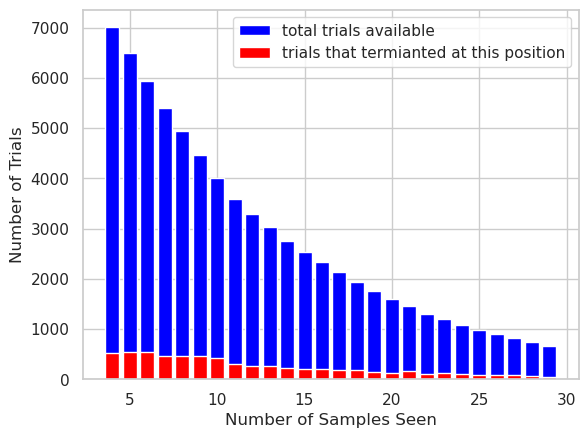

In [25]:
# percentage of trials people terminal at each sample position 

my_labels =['total trials available', 'trials that termianted at this position']
for num_of_samples in range(4,30):

    dataset = binary_seq_all[count>=num_of_samples, :]
    dataset_resp = np.isnan(
        dataset[:, num_of_samples]
    )  # True means they stopped, false means they kept going
    dataset = dataset[:, :num_of_samples]
    plt.bar(num_of_samples, len(dataset), color='blue', label=my_labels[0])
    plt.bar(num_of_samples, dataset_resp.sum(),color='red', label=my_labels[1])
    my_labels = ['__nolabels__']*2
    # size of the samples 
    print(len(dataset))                                                         
    # percentage of termination
    print(dataset_resp.sum() / len(dataset))

plt.xlabel("Number of Samples Seen")
plt.ylabel("Number of Trials")
plt.legend()
plt.show()